In [1]:
!nvidia-smi

Thu Sep 16 16:42:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 13 kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
IMAGE_SIZE = [224, 224]
X= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'
y= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'

In [6]:
from sklearn.model_selection import train_test_split
X_train, y_train,X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/*')

In [10]:
folders

['/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Pneumonia',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Fungal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Viral',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Tuberculosis',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Covid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Lipoid',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Bacterial',
 '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Other']

In [11]:
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
55/55 [==============================] - 538s 10s/step - loss: 5.8685 - accuracy: 0.1961 - val_loss: 2.4656 - val_accuracy: 0.4151
Epoch 2/20
55/55 [==============================] - 340s 6s/step - loss: 2.3393 - accuracy: 0.4196 - val_loss: 1.8612 - val_accuracy: 0.4310
Epoch 3/20
55/55 [==============================] - 340s 6s/step - loss: 1.9890 - accuracy: 0.4607 - val_loss: 1.9566 - val_accuracy: 0.4424
Epoch 4/20
55/55 [==============================] - 339s 6s/step - loss: 1.8325 - accuracy: 0.5131 - val_loss: 1.7716 - val_accuracy: 0.4926
Epoch 5/20
55/55 [==============================] - 339s 6s/step - loss: 1.5031 - accuracy: 0.5656 - val_loss: 1.0741 - val_accuracy: 0.6967
Epoch 6/20
55/55 [==============================] - 335s 6s/step - loss: 1.7451 - accuracy: 0.5530 - val_loss: 1.9967 - val_accuracy: 0.5747
Epoch 7/20
55/55 [==============================] - 338s 6s/step - loss: 1.6954 - accuracy: 0.5770 - val_loss: 1.0468 - val_accuracy: 0.6739
Epoch 8/20
5

In [19]:
import matplotlib.pyplot as plt

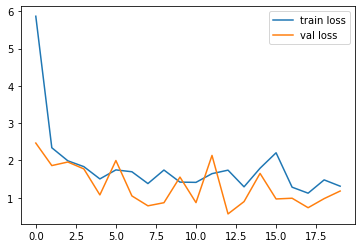

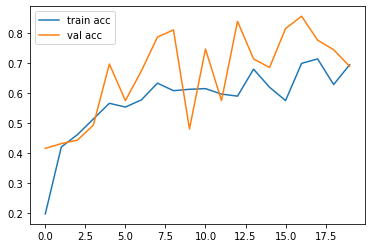

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[2.9302228e-04, 7.1175295e-05, 7.9715288e-01, ..., 2.0036972e-01,
        1.9180213e-06, 1.1648415e-03],
       [2.2102526e-11, 9.9998915e-01, 7.0744101e-12, ..., 1.9066811e-10,
        2.2070961e-12, 1.0873028e-05],
       [3.7980359e-02, 1.3153397e-03, 6.3046835e-05, ..., 2.3366565e-01,
        1.2664924e-05, 7.2557402e-01],
       ...,
       [1.4366856e-23, 4.3284265e-19, 1.3747607e-29, ..., 1.8389564e-25,
        3.1466286e-23, 5.4204438e-23],
       [4.8509142e-03, 2.6209456e-01, 2.1085923e-04, ..., 5.2494878e-01,
        8.3397914e-05, 8.1262477e-03],
       [9.7264419e-06, 1.2608546e-04, 4.3208888e-06, ..., 7.7765957e-03,
        5.5450550e-07, 3.5231391e-05]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([2, 1, 9, 7, 7, 7, 5, 7, 5, 4, 9, 7, 3, 5, 7, 2, 7, 5, 9, 7, 5, 7,
       4, 7, 5, 7, 8, 9, 7, 7, 8, 7, 9, 4, 7, 9, 9, 1, 2, 5, 4, 7, 3, 7,
       9, 7, 8, 3, 5, 7, 3, 3, 9, 7, 9, 9, 9, 9, 7, 8, 7, 7, 3, 4, 5, 5,
       7, 8, 9, 7, 4, 5, 5, 7, 7, 9, 8, 4, 4, 7, 9, 7, 5, 4, 7, 4, 5, 9,
       3, 1, 3, 8, 9, 4, 4, 7, 3, 7, 7, 9, 7, 3, 7, 5, 7, 5, 5, 5, 9, 7,
       7, 9, 7, 4, 7, 9, 9, 7, 9, 3, 4, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 9,
       9, 5, 9, 4, 9, 8, 7, 7, 3, 7, 3, 5, 7, 9, 7, 3, 9, 7, 7, 7, 9, 9,
       7, 9, 5, 3, 2, 9, 7, 2, 7, 8, 9, 5, 7, 3, 7, 5, 7, 3, 4, 3, 9, 4,
       7, 9, 7, 9, 7, 4, 7, 4, 7, 7, 9, 7, 7, 7, 7, 9, 9, 4, 7, 7, 3, 7,
       9, 4, 4, 9, 5, 5, 7, 9, 5, 4, 8, 3, 9, 7, 4, 5, 7, 5, 5, 7, 8, 7,
       4, 5, 7, 7, 7, 8, 9, 5, 8, 7, 7, 7, 8, 7, 7, 9, 5, 5, 8, 7, 4, 4,
       4, 7, 7, 7, 5, 3, 7, 6, 4, 4, 6, 7, 4, 5, 5, 4, 9, 3, 9, 7, 4, 4,
       7, 3, 5, 7, 5, 5, 9, 4, 7, 4, 5, 8, 8, 8, 3, 7, 7, 9, 1, 7, 7, 7,
       7, 7, 5, 8, 8, 7, 4, 7, 7, 3, 7, 5, 5, 9, 8,

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [28]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Unknown/Unknown_0_1080.jpeg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)

In [30]:
x

array([[[  3.,   3.,   3.],
        [ 57.,  57.,  57.],
        [ 82.,  82.,  82.],
        ...,
        [155., 155., 155.],
        [164., 164., 164.],
        [169., 169., 169.]],

       [[102., 102., 102.],
        [ 94.,  94.,  94.],
        [ 79.,  79.,  79.],
        ...,
        [ 12.,  12.,  12.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.]],

       [[132., 132., 132.],
        [104., 104., 104.],
        [ 83.,  83.,  83.],
        ...,
        [ 10.,  10.,  10.],
        [  1.,   1.,   1.],
        [242., 242., 242.]],

       ...,

       [[179., 179., 179.],
        [183., 183., 183.],
        [183., 183., 183.],
        ...,
        [142., 142., 142.],
        [144., 144., 144.],
        [151., 151., 151.]],

       [[ 11.,  11.,  11.],
        [  3.,   3.,   3.],
        [  6.,   6.,   6.],
        ...,
        [157., 157., 157.],
        [151., 151., 151.],
        [150., 150., 150.]],

       [[ 14.,  14.,  14.],
        [  7.,   7.,   7.],
        [  7.,  

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
img_data

array([[[[-103.92724 , -116.767235, -123.668236],
         [-103.71548 , -116.55547 , -123.456474],
         [-103.61743 , -116.45743 , -123.35843 ],
         ...,
         [-103.33116 , -116.17116 , -123.07216 ],
         [-103.29587 , -116.135864, -123.036865],
         [-103.27626 , -116.11626 , -123.01726 ]],

        [[-103.539   , -116.379   , -123.28    ],
         [-103.57037 , -116.41037 , -123.31137 ],
         [-103.629196, -116.46919 , -123.37019 ],
         ...,
         [-103.891945, -116.73194 , -123.63294 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.915474, -116.75547 , -123.65647 ]],

        [[-103.42136 , -116.26135 , -123.16235 ],
         [-103.53116 , -116.371155, -123.272156],
         [-103.61351 , -116.45351 , -123.35451 ],
         ...,
         [-103.89979 , -116.739784, -123.640785],
         [-103.93508 , -116.77508 , -123.67608 ],
         [-102.98998 , -115.82998 , -122.73098 ]],

        ...,

        [[-103.237045, -116.07704 , -1

In [35]:
model.predict(img_data)

array([[4.1316874e-17, 7.2086586e-13, 2.6786235e-15, 1.6542043e-22,
        7.8941497e-21, 3.4499649e-08, 1.7729993e-08, 1.6703919e-01,
        2.6925796e-28, 8.3296078e-01]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
a==1

array([False])